In [928]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [929]:
# prompt: conectar al drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [930]:
df=pd.read_csv("/content/drive/MyDrive/CLASE MASTER/Walmart(1).csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [931]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [932]:
df['Store'] = df['Store'].astype('object')

In [933]:
df['Holiday_Flag'] = df['Holiday_Flag'].astype('object')

In [934]:
df.dtypes

Store                   object
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag            object
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [935]:
df.shape

(6435, 8)

In [936]:
df.describe()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,2011-06-17 00:00:00,1.046965e+06,60.663782,3.358607,171.578394,7.999151
min,2010-02-05 00:00:00,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,2010-10-08 00:00:00,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,2011-06-17 00:00:00,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,2012-02-24 00:00:00,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,2012-10-26 00:00:00,3.818686e+06,100.140000,4.468000,227.232807,14.313000
std,NaN,5.643666e+05,18.444933,0.459020,39.356712,1.875885


In [937]:
print(df.columns.to_list())

['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [938]:
df['year'], df['month'] = df['Date'].dt.year, df['Date'].dt.month
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [939]:
df['year'] = df['year'].astype('object')

In [940]:
df['month'] = df['month'].astype('object')

In [941]:
df.dtypes

Store                   object
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag            object
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
year                    object
month                   object
dtype: object

In [942]:
#months={1:'Enero',2:'Febrero',3:'Marzo',4:'Abril',5:'Mayo',6:'Junio',7:'Julio',8:'Agosto',9:'Septiembre',10:'Octobre',11:'Noviembre',12:'Diciembre'}
#df['month']= df['month'].map(months)
#df.head()

Text(0.5, 1.0, 'Ventas Anuales')

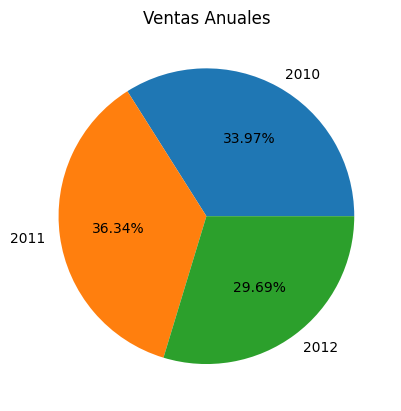

In [943]:
plt.pie(df.groupby('year')['Weekly_Sales'].sum(),labels=df['year'].unique(),normalize=True,autopct='%1.2f%%')
plt.title('Ventas Anuales')

In [944]:
#df3 = df.groupby('month')['Weekly_Sales'].sum().reset_index()

#df3.head()

In [945]:
#plt.figure(figsize=(10,10))
#plt.pie(df3['Weekly_Sales'],labels=df3['month'],normalize=True,autopct='%1.2f%%')
#plt.title('Ventas Mensuales')

In [946]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [947]:
var_cualitativas

Index(['Store', 'Holiday_Flag', 'year', 'month'], dtype='object')

In [948]:
var_cuantitativas

Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], dtype='object')

In [949]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
dtype: int64

In [950]:
var_cualitativas

Index(['Store', 'Holiday_Flag', 'year', 'month'], dtype='object')

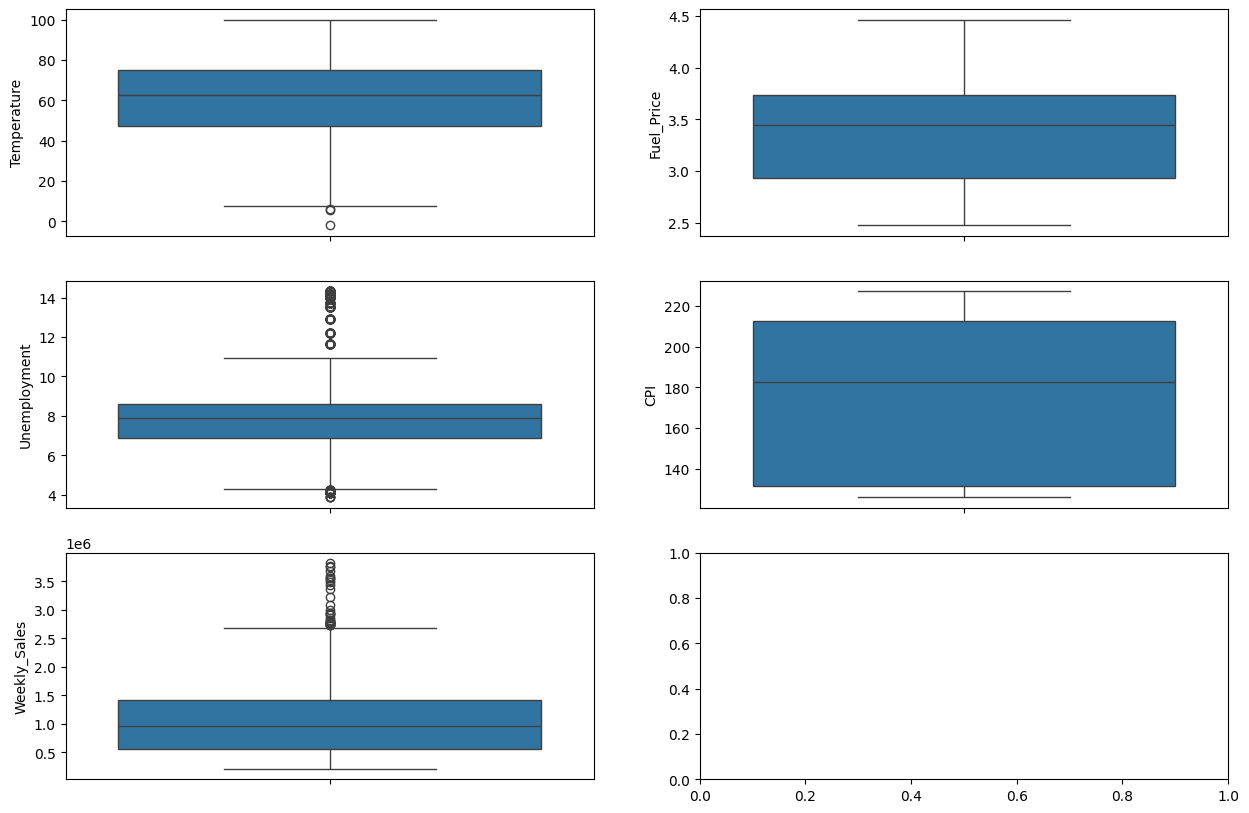

In [951]:
# Box plots
fig, axs = plt.subplots(3,2, figsize = (15,10))
plt1 = sns.boxplot(df['Temperature'], ax = axs[0,0])
plt2 = sns.boxplot(df['Fuel_Price'], ax = axs[0,1])
plt3 = sns.boxplot(df['Unemployment'], ax = axs[1,0])
plt1 = sns.boxplot(df['CPI'], ax = axs[1,1])
plt2 = sns.boxplot(df['Weekly_Sales'], ax = axs[2,0])


In [952]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Unemployment.quantile(0.25)
Q3 = df.Unemployment.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)


1.7309999999999999


In [953]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Unemployment'] < (Q1 - 1.5 * IQR)) |(df['Unemployment'] > (Q3 + 1.5 * IQR)))]
df.shape

(5954, 10)

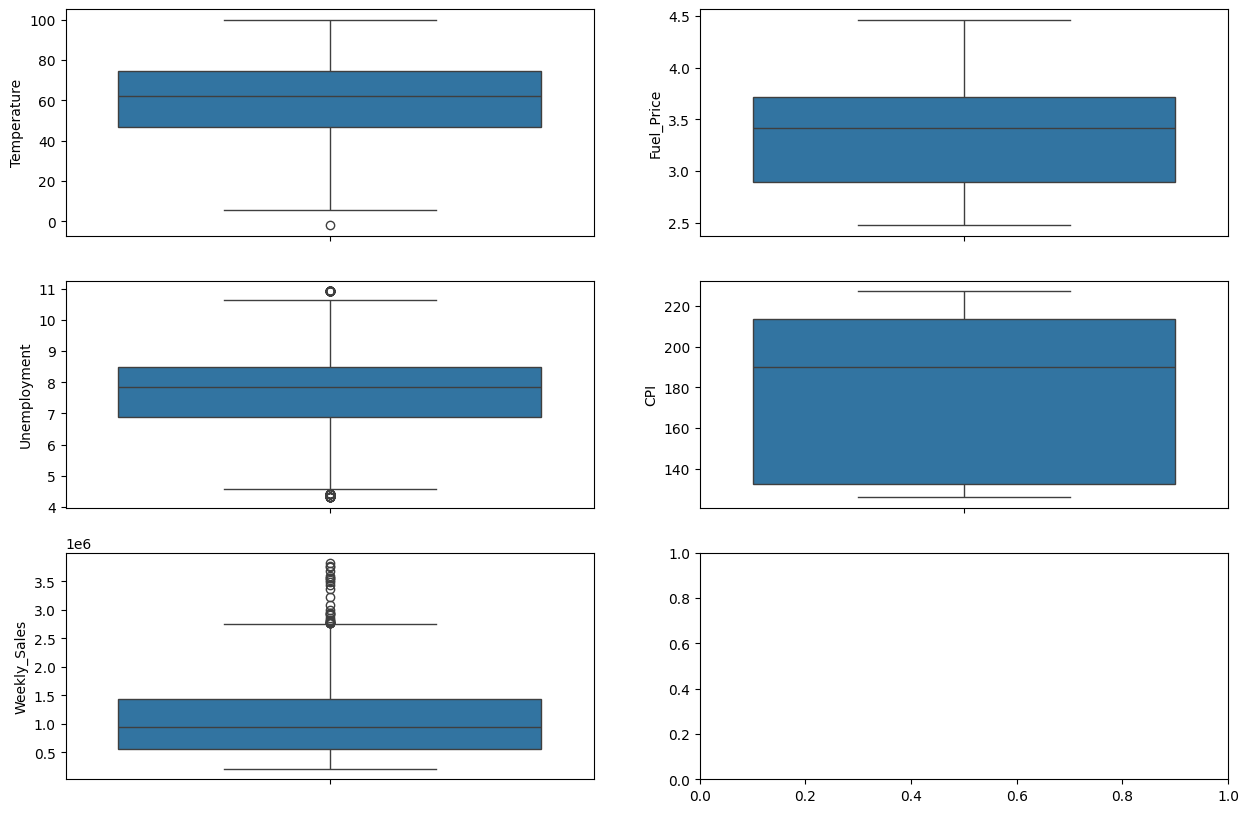

In [954]:
# Box plots
fig, axs = plt.subplots(3,2, figsize = (15,10))
plt1 = sns.boxplot(df['Temperature'], ax = axs[0,0])
plt2 = sns.boxplot(df['Fuel_Price'], ax = axs[0,1])
plt3 = sns.boxplot(df['Unemployment'], ax = axs[1,0])
plt1 = sns.boxplot(df['CPI'], ax = axs[1,1])
plt2 = sns.boxplot(df['Weekly_Sales'], ax = axs[2,0])


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

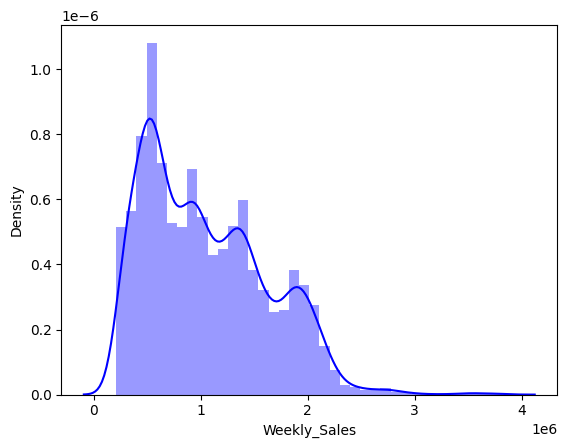

In [955]:
sns.distplot(df['Weekly_Sales'],color="blue")

<Axes: xlabel='Temperature', ylabel='Density'>

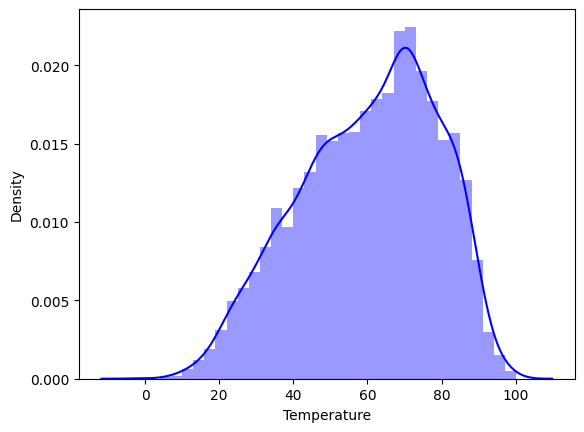

In [956]:
sns.distplot(df['Temperature'],color="blue")

<Axes: xlabel='Fuel_Price', ylabel='Density'>

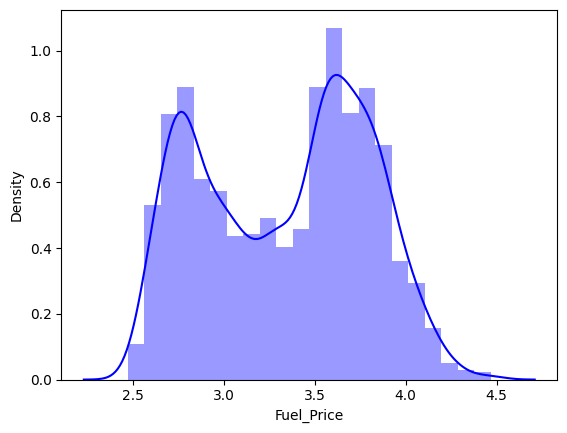

In [957]:
sns.distplot(df['Fuel_Price'],color="blue")

<Axes: xlabel='Unemployment', ylabel='Density'>

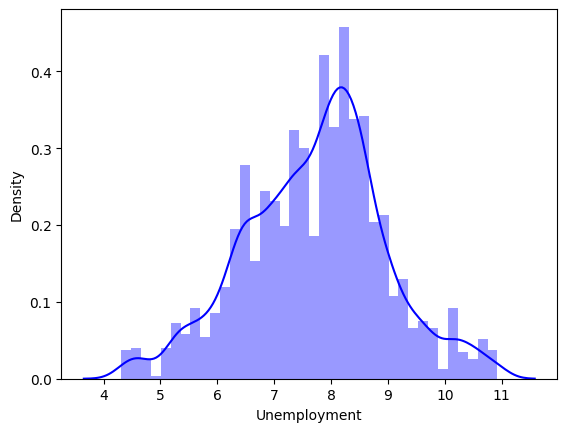

In [958]:
sns.distplot(df['Unemployment'],color="blue")

<Axes: xlabel='CPI', ylabel='Density'>

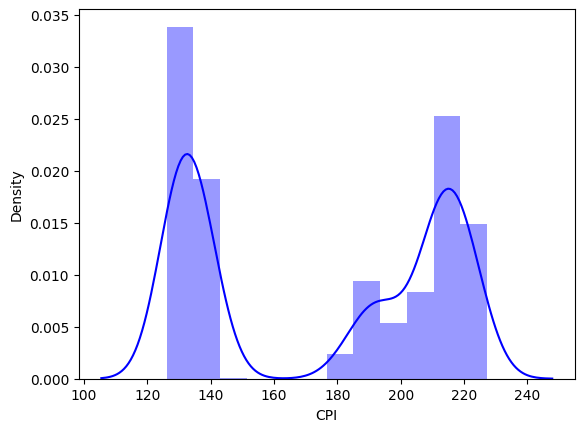

In [959]:
sns.distplot(df['CPI'],color="blue")

In [960]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.061389,0.011257,-0.087443,-0.074999
Temperature,-0.061389,1.000000,0.147560,0.218762,0.026236
Fuel_Price,0.011257,0.147560,1.000000,-0.142689,-0.104268
CPI,-0.087443,0.218762,-0.142689,1.000000,-0.216206
Unemployment,-0.074999,0.026236,-0.104268,-0.216206,1.000000


In [961]:
df_ = pd.get_dummies(df,columns=['Store','Holiday_Flag'])
df_.head()
print(df_.columns.to_list())

['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0', 'Holiday_Flag_1']


In [962]:
X = df_.drop(['Date','Weekly_Sales','year','month','Store_1','Holiday_Flag_0'],axis=1)
y = df_.Weekly_Sales

In [963]:
var_X = X.columns
var_X

Index(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_2',
       'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8',
       'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14',
       'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20',
       'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26',
       'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32',
       'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38',
       'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44',
       'Store_45', 'Holiday_Flag_1'],
      dtype='object')

In [964]:
from sklearn.model_selection import train_test_split

In [965]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=123)

In [966]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(5358, 49)  <class 'pandas.core.frame.DataFrame'>
(5358,) 	  <class 'pandas.core.series.Series'>
(596, 49)  <class 'pandas.core.frame.DataFrame'>
(596,) 	  <class 'pandas.core.series.Series'>


In [967]:
from sklearn.linear_model import LinearRegression

In [968]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [969]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

In [970]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [971]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

26061606578.7453
26541682094.386703


In [972]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

161436.07582800474
162916.18119262034


In [973]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

91395.82746256446
94078.9788347326


In [974]:
from sklearn.metrics import r2_score

In [975]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train.round(2))
print('El R^2 del subconjunto de prueba es:' , r_square_test.round(2))

El R^2 del subconjunto de entrenamiento es: 0.92
El R^2 del subconjunto de prueba es: 0.92


In [976]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_)

intercepto: 1292567.50089531
pendiente: [-7.79254409e+02 -4.52749265e+04  3.10212764e+03 -2.88794286e+04
  3.77429718e+05 -1.16660280e+06  7.63416347e+05 -1.26965575e+06
 -1.25499019e+04 -9.03856461e+05 -6.97827974e+05 -1.06021450e+06
  6.66294278e+05 -2.15056823e+05 -1.83154152e+05  7.03810255e+05
  5.87422407e+05 -6.60266320e+05 -1.00950103e+06 -4.21810292e+05
 -1.81376565e+05  1.66371963e+05  5.78919219e+05 -7.88841993e+05
 -2.73845942e+05  2.22097165e+04  8.78481256e+04 -8.32920665e+05
 -2.94946265e+05  4.83170709e+05  8.31488957e+04 -6.93608693e+05
 -1.10734998e+06 -1.50835668e+05 -2.99383328e+05 -9.70439912e+05
 -2.54614122e+05 -3.57214375e+05 -1.16282506e+06 -1.01581700e+06
 -7.14313169e+05 -8.35070631e+04 -4.19898513e+05 -2.46328351e+05
 -6.79857922e+05 -8.22324416e+05 -1.00795022e+06 -6.36304425e+05
  6.71360243e+04]


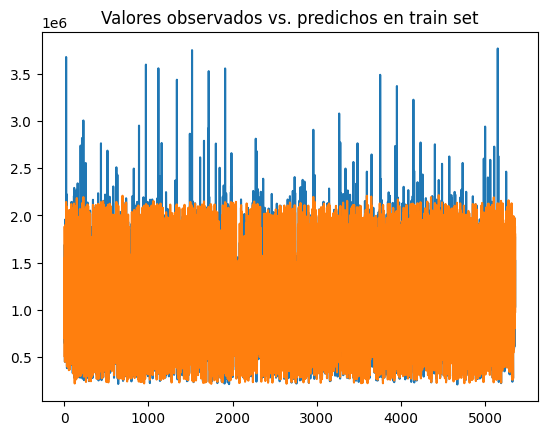

In [977]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

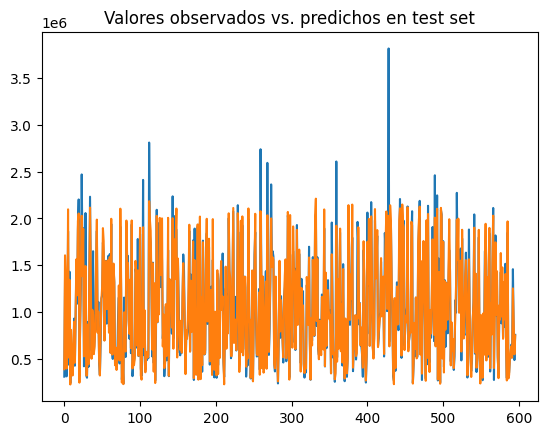

In [978]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

In [979]:
from sklearn.preprocessing import StandardScaler

In [980]:
sc = StandardScaler()

In [981]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [982]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

In [983]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

In [984]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std.round(2))
print('El R^2 del subconjunto de prueba es:' , r_square_test_std.round(2))

El R^2 del subconjunto de entrenamiento es: 0.92
El R^2 del subconjunto de prueba es: 0.92


In [985]:
importancia = modelo_regresion_std.coef_

In [986]:
modelo_regresion_std.coef_.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [987]:
# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: -14364.37709
Variable explicativa No. 1, Score: -20715.16672
Variable explicativa No. 2, Score: 121211.84891
Variable explicativa No. 3, Score: -35885.87124
Variable explicativa No. 4, Score: 58290.16451
Variable explicativa No. 5, Score: -176782.57021
Variable explicativa No. 6, Score: 110636.28764
Variable explicativa No. 7, Score: -193882.71924
Variable explicativa No. 8, Score: -1879.52680
Variable explicativa No. 9, Score: -139070.88661
Variable explicativa No. 10, Score: -106154.86107
Variable explicativa No. 11, Score: -161900.00430
Variable explicativa No. 12, Score: 102518.64088
Variable explicativa No. 13, Score: -32840.24181
Variable explicativa No. 14, Score: -9677.25703
Variable explicativa No. 15, Score: 108290.99569
Variable explicativa No. 16, Score: 86209.36505
Variable explicativa No. 17, Score: -101591.15572
Variable explicativa No. 18, Score: -152382.26711
Variable explicativa No. 19, Score: -64412.52021
Variable explicativa No. 20

In [1002]:
# Ordena los scores y toma los más grandes
indices_mayores = np.argsort(abs(importancia))[::-1][:10]

# Imprime los scores más grandes y sus variables correspondientes
for i in indices_mayores:
    print('Variable explicativa No. %0d, Score: %.5f' % (i, abs(importancia[i])))


Variable explicativa No. 7, Score: 193882.71924
Variable explicativa No. 38, Score: 177569.14495
Variable explicativa No. 5, Score: 176782.57021
Variable explicativa No. 32, Score: 170381.19424
Variable explicativa No. 11, Score: 161900.00430
Variable explicativa No. 39, Score: 155710.15771
Variable explicativa No. 46, Score: 153331.22165
Variable explicativa No. 18, Score: 152382.26711
Variable explicativa No. 35, Score: 147056.78965
Variable explicativa No. 9, Score: 139070.88661


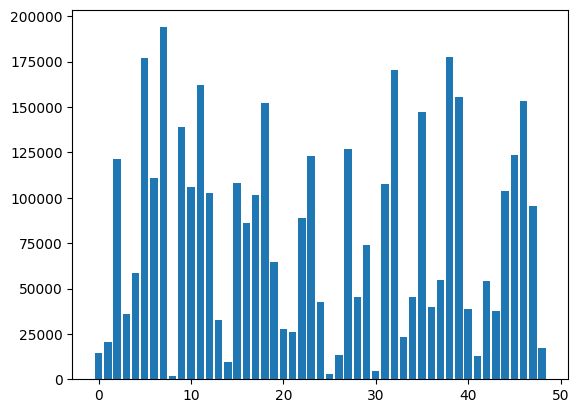

In [994]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], abs(importancia))
plt.show()